In [3]:
# 50
import pandas as pd
from sklearn.model_selection import train_test_split
PATH = "/content/dataset/"


data_frame = pd.read_table(PATH+"newsCorpora.csv", index_col=0,
                   names = ("ID", "TITLE", "URL", "PUBLISHER", "CATEGORY", "STORY", "HOSTNAME", "TIMESTAMP"))
# data_file.head()

data_frame_extracted = data_frame[(data_frame["PUBLISHER"]=="Reuters")|(data_frame["PUBLISHER"]=="Huffington Post")|(data_frame["PUBLISHER"]=="Businessweek")|
            (data_frame["PUBLISHER"]=="Contactmusic.com")|(data_frame["PUBLISHER"]=="Daily Mail")]
            # 情報源が”Reuters”, “Huffington Post”, “Businessweek”, “Contactmusic.com”, “Daily Mail”の事例を抽出する．
# data_file_extracted.head()

df_Train , df_Test = train_test_split(data_frame_extracted, test_size=0.2, random_state=100)
df_Test , df_Valid = train_test_split(df_Test, test_size=0.5, random_state=100)
# 抽出された事例を分割する
# df_Train.head()
# df_Test.head()
# df_Valid.head()

df_Train.to_csv(PATH + "train.txt",sep='\t', index=False)

df_Test.to_csv(PATH + "test.txt",sep='\t', index=False)

df_Valid.to_csv(PATH + "valid.txt",sep='\t', index=False)

print(df_Train.shape)
print(df_Test.shape)
print(df_Valid.shape)



(10672, 7)
(1334, 7)
(1334, 7)


In [3]:
# 51
import collections
import re
import pandas as pd

def Process(lines):
    sign_regrex = re.compile('[!"#$%&\'()*+,-./:;<=>?@[\\]^_`|＄＃＠£â€™é\n]')
    lines = sign_regrex.sub("", lines)
    # 記号など削除する

    lines = re.sub("(\d+)", r" \1 ", lines)
    # 数字をsapceに置換する

    texts = lines.split(" ")
    # sapceで分けて

    texts = list(filter(lambda x:x, texts))
    #空リスト削除

    word_list = list(map(lambda x:x.lower(), texts))
    #小文字にする

    return word_list


def MakeDict(name):
    # 辞書を作る

    f = open(PATH + "{}.txt".format(name), "r")
    lines = f.readlines()
    f.close()
    # fileから読み込んで

    word_list = []

    for line in lines:
        word_list.extend(Process(line))
        # Process関数で単語リストを作る

    c = collections.Counter(word_list).most_common()
    # Counterで単語の出現回数を数える
    # 頻度順に並びます


    word_dic = {}
    # 単語の辞書を作る
    i = 1
    for word in c:
      word_dic[word[0]] = i
      i += 1
    return word_dic

def MakeOneHot(text):
    # one-hot表現を作る
    temp = []
    word_list = Process(text)
    # Process関数で単語リストを作る
    base_list = [0]*len(GlobalWordDict)
    # 全単語のリストを作る

    for word in word_list:
      # 各単語は単語辞書（GlobalWordDict）に基づいてベクトル化され
      # その単語が存在する場合は対応するインデックスの要素が1になります。
        try:
          base_list[GlobalWordDict[word]] = 1
        except:
          pass
    return base_list

def MakeFeatureText(name):
    df = pd.read_table(PATH + "{}.txt".format(name))
    df_2 = pd.DataFrame(list(df["TITLE"].apply(MakeOneHot)))
    # 記事の見出しを単語列に変換
    # MakeOneHot関数でone-hot表現を作る


    df_3 = pd.concat([df, df_2], axis=1)
    # 元のdataframeとone-hotになったdataframeを結合する

    df_3.to_csv(PATH + "{}.feature.txt".format(name))
    # fileに出力する

GlobalWordDict = MakeDict("train")
# 全単語の辞書を作る
MakeFeatureText("train")
MakeFeatureText("test")
MakeFeatureText("valid")



In [ ]:
train_pd = pd.read_csv(PATH + "train.feature.txt")
train_pd.head()

,Unnamed: 0,TITLE,URL,PUBLISHER,CATEGORY,STORY,HOSTNAME,TIMESTAMP,0,1,...,61746,61747,61748,61749,61750,61751,61752,61753,61754,61755
0,0,Uber Demonstrations Snarl Traffic From London ...,http://www.businessweek.com/news/2014-06-10/ub...,Businessweek,b,dSZQxXz451BKSYMrSSGlT7ubad4eM,www.businessweek.com,1402657190241,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,Tepco Seeks Bids for Thermal Power as Nuclear ...,http://www.businessweek.com/news/2014-04-11/te...,Businessweek,b,dfKK8dDL5BOL2TMqnNX0Zj646SGfM,www.businessweek.com,1397228067402,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,Fitch: JPMorgan 1Q'14 Results Hurt by Weaker M...,http://www.reuters.com/article/2014/04/11/fitc...,Reuters,b,dSAALz3Yg1Ijh5MZVzXN3nqotlp2M,www.reuters.com,1397290885417,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,Putting People First: The Yellen Era Begins at...,http://www.huffingtonpost.com/heidi-hartmann/p...,Huffington Post,b,dqYrKBucQDoKKnMa4uJ6KQBBUlDqM,www.huffingtonpost.com,1395154014315,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,You Are Not Pregnant. We're Pregnant! Mila Kun...,http://www.contactmusic.com/article/you-are-no...,Contactmusic.com,e,dQEXtwpswiNW-4MJkBLcTFNZCQ42M,www.contactmusic.com,1402685897370,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
test_pd = pd.read_csv(PATH + "test.feature.txt")
test_pd.head()

,Unnamed: 0,TITLE,URL,PUBLISHER,CATEGORY,STORY,HOSTNAME,TIMESTAMP,0,1,...,61746,61747,61748,61749,61750,61751,61752,61753,61754,61755
0,0,Carlos Saldanha: 'Rio' Movies Began From My 'N...,http://www.huffingtonpost.com/2014/04/11/carlo...,Huffington Post,e,dyjwYV6L2OQ1JEMFhOWDVwX4jc-vM,www.huffingtonpost.com,1397242440423,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,Channing Tatum Calls Himself A 'High-Functioni...,http://www.huffingtonpost.com/2014/05/20/chann...,Huffington Post,e,daTpJHFnADnp3HME4QhqFqW6qiCkM,www.huffingtonpost.com,1400652926351,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,UPDATE 3-Cyprus lenders say recession not as b...,http://www.reuters.com/article/2014/05/17/cypr...,Reuters,b,dEKAwiKk6PDi1qMRojyoLjYpZ2p7M,www.reuters.com,1400373917305,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,CANADA FX DEBT-C$ at nearly 3-month high after...,http://in.reuters.com/article/2014/04/09/marke...,Reuters,b,dhpby_46Ae5iB8ME-y0QZ8gSCJwLM,in.reuters.com,1397289084411,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,Make Your Photos More #Hoffsome With This Goog...,http://www.huffingtonpost.com/2014/04/01/hoffs...,Huffington Post,t,drbQ48-b4l7fkiMW9eHEV-YPKu_dM,www.huffingtonpost.com,1396371241211,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
valid_pd = pd.read_csv(PATH + "valid.feature.txt")
valid_pd.head()

,Unnamed: 0,TITLE,URL,PUBLISHER,CATEGORY,STORY,HOSTNAME,TIMESTAMP,0,1,...,61746,61747,61748,61749,61750,61751,61752,61753,61754,61755
0,0,"Chris Pine Pleads Guilty To DUI, Gets Six Mont...",http://www.contactmusic.com/article/chris-pine...,Contactmusic.com,e,dwXznuDZkJ7M3kM6wa_cKyGn1pnKM,www.contactmusic.com,1395062967072,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,Detroit Institute of Arts secures $26.8 mln fo...,http://in.reuters.com/article/2014/07/16/usa-d...,Reuters,b,dd6Ej-SQb7wGfwMpR23P80jlMZLRM,in.reuters.com,1405560051946,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,Ryan Gosling Attached To Busby Berkeley Biopic,http://www.huffingtonpost.com/2014/03/20/ryan-...,Huffington Post,e,dTU0cbX1HRUJppMLx-X4yEf-1BiMM,www.huffingtonpost.com,1395328199132,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,'It's the toughest thing I've ever done': Aria...,http://www.dailymail.co.uk/tvshowbiz/article-2...,Daily Mail,e,dawhV3grbl1ej2M2KLW5zk1J8UQNM,www.dailymail.co.uk,1406869432757,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,Ford's New CEO Mark Fields Eligible for 33% Ri...,http://www.businessweek.com/news/2014-07-02/fo...,Businessweek,b,d-Cs8GmvKJ7SIzMkjFWksebkfCSSM,www.businessweek.com,1404375634600,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
%%bash
pip install scikit-learn

In [4]:
# 52
from sklearn.linear_model import LogisticRegression
import pickle
import pandas as pd

# CATEGORYをencodeする
# b = business, t = science and technology, e = entertainment, m = health
def Encoder(category):
    if category == "b":
        return 0
    elif category == "t":
        return 1
    elif category == "e":
        return 2
    elif category == "m":
        return 3
    else:
        pass
def Decoder(category):
    if category == 0:
        return "b"
    elif category == 1:
        return "t"
    elif category == 2:
        return "e"
    elif category == 3:
        return "m"
    else:
        pass

# 学習データを読み込む
train_data = pd.read_csv(PATH + "train.feature.txt")

train_data.head()

X_train = train_data.iloc[:, 8:].values.tolist()

train_data["CATEGORY"] = train_data["CATEGORY"].map(Encoder)
# X,Yは数値型ので　CATEGORYをencodeする
Y_train = train_data["CATEGORY"].values.tolist()
# print(Y)
# X: TITLE	から Y: CATEGORY	とその予測確率


LR_model = LogisticRegression(max_iter=1500)
LR_model.fit(X_train, Y_train)

pickle.dump(LR_model, open(PATH + "LR_model.sav", "wb"))
# modelを保存する


In [5]:
# 53
test_data = pd.read_csv(PATH + "test.feature.txt")
# test_data.head()

X_test = test_data.iloc[:, 8:].values.tolist()

test_data["CATEGORY"] = test_data["CATEGORY"].map(Encoder)
# X,Yは数値型ので　CATEGORYをencodeする
Y_test = test_data["CATEGORY"].values.tolist()
# print(Y_test)
# 正解率のとき使う

LR_model = pickle.load(open(PATH + "LR_model.sav", "rb"))
# modelを読み込む


proba = LR_model.predict_proba(X_test)
# 予測確率を計算する
Y_pred_test = LR_model.predict(X_test)
# print(Y_pred_test)
# 正解率のとき使う

result = pd.DataFrame()
proba = pd.DataFrame(proba)


result["TITLE"] = test_data["TITLE"]

result["CATEGORY"] = test_data["CATEGORY"].map(Decoder)
# decoderして、CATEGORY列に入れる
result["PREDICT_PROBABILITY"] = proba.max(axis=1)
# 最大予測確率を列に入れる

result.head()


[2, 2, 0, 0, 1, 3, 0, 0, 2, 1, 0, 2, 0, 0, 3, 2, 2, 1, 2, 0, 2, 1, 0, 1, 0, 0, 2, 2, 2, 0, 2, 2, 0, 0, 0, 1, 2, 2, 3, 2, 0, 2, 0, 0, 1, 0, 0, 2, 2, 0, 0, 2, 2, 2, 0, 0, 3, 2, 0, 2, 2, 2, 0, 3, 2, 2, 0, 0, 2, 2, 0, 0, 2, 3, 0, 2, 0, 0, 2, 2, 3, 2, 0, 0, 0, 2, 2, 0, 1, 1, 0, 0, 1, 2, 0, 0, 2, 2, 0, 2, 3, 2, 2, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 2, 1, 1, 2, 2, 2, 2, 0, 0, 0, 0, 2, 3, 1, 0, 3, 2, 2, 2, 0, 1, 0, 0, 2, 2, 2, 2, 2, 3, 2, 1, 0, 2, 2, 2, 2, 0, 1, 0, 2, 2, 0, 0, 0, 2, 2, 2, 1, 2, 0, 2, 2, 1, 2, 0, 0, 0, 2, 2, 2, 3, 0, 0, 0, 0, 0, 0, 2, 1, 2, 0, 2, 0, 0, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 0, 1, 2, 0, 0, 0, 0, 3, 2, 2, 3, 2, 0, 1, 2, 0, 0, 0, 2, 2, 0, 2, 3, 2, 0, 2, 2, 1, 3, 3, 2, 2, 3, 1, 0, 2, 0, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 0, 2, 2, 0, 0, 2, 1, 2, 1, 2, 3, 2, 2, 0, 0, 0, 2, 0, 2, 2, 3, 0, 0, 2, 2, 2, 3, 3, 1, 0, 2, 0, 0, 3, 0, 2, 0, 0, 2, 0, 0, 1, 0, 0, 2, 2, 2, 2, 0, 2, 1, 3, 0, 0, 1, 0, 0, 0, 2, 3, 0, 2, 0, 2, 0, 2, 0, 2, 3, 0, 0, 2, 2, 2, 2, 1, 0, 0, 2, 2, 0, 

,TITLE,CATEGORY,PREDICT_PROBABILITY
0,Carlos Saldanha: 'Rio' Movies Began From My 'N...,e,0.837076
1,Channing Tatum Calls Himself A 'High-Functioni...,e,0.894156
2,UPDATE 3-Cyprus lenders say recession not as b...,b,0.871620
3,CANADA FX DEBT-C$ at nearly 3-month high after...,b,0.993251
4,Make Your Photos More #Hoffsome With This Goog...,t,0.973970


In [6]:
# 54
from sklearn.metrics import accuracy_score

Y_pred_train = LR_model.predict(X_train)
print("訓練データ",accuracy_score(Y_train, Y_pred_train))


print("テストデータ",accuracy_score(Y_test, Y_pred_test))

訓練データ 0.9959707646176912
テストデータ 0.9107946026986506


      b     t     e    m
b  4461     4     2    0
t    15  1221     8    0
e     6     0  4220    0
m     3     0     5  727
[2, 2, 0, 0, 1, 3, 0, 0, 2, 1, 0, 2, 0, 0, 3, 2, 2, 1, 2, 0, 2, 1, 0, 1, 0, 0, 2, 2, 2, 0, 2, 2, 0, 0, 0, 1, 2, 2, 3, 2, 0, 2, 0, 0, 1, 0, 0, 2, 2, 0, 0, 2, 2, 2, 0, 0, 3, 2, 0, 2, 2, 2, 0, 3, 2, 2, 0, 0, 2, 2, 0, 0, 2, 3, 0, 2, 0, 0, 2, 2, 3, 2, 0, 0, 0, 2, 2, 0, 1, 1, 0, 0, 1, 2, 0, 0, 2, 2, 0, 2, 3, 2, 2, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 2, 1, 1, 2, 2, 2, 2, 0, 0, 0, 0, 2, 3, 1, 0, 3, 2, 2, 2, 0, 1, 0, 0, 2, 2, 2, 2, 2, 3, 2, 1, 0, 2, 2, 2, 2, 0, 1, 0, 2, 2, 0, 0, 0, 2, 2, 2, 1, 2, 0, 2, 2, 1, 2, 0, 0, 0, 2, 2, 2, 3, 0, 0, 0, 0, 0, 0, 2, 1, 2, 0, 2, 0, 0, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 0, 1, 2, 0, 0, 0, 0, 3, 2, 2, 3, 2, 0, 1, 2, 0, 0, 0, 2, 2, 0, 2, 3, 2, 0, 2, 2, 1, 3, 3, 2, 2, 3, 1, 0, 2, 0, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 0, 2, 2, 0, 0, 2, 1, 2, 1, 2, 3, 2, 2, 0, 0, 0, 2, 0, 2, 2, 3, 0, 0, 2, 2, 2, 3, 3, 1, 0, 2, 0, 0, 3, 0, 2, 0, 0, 2, 0

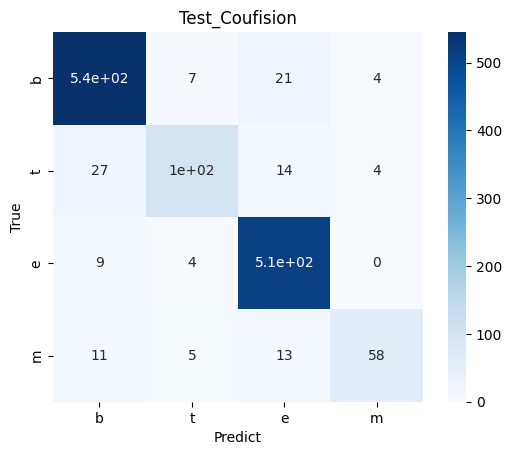

In [8]:
# 55
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 学習データの混同行列
cm = confusion_matrix(Y_train, Y_pred_train)
# print(cm)
cm = pd.DataFrame(cm,["b","t","e","m"],["b","t","e","m"])
print(cm)
sns.heatmap(cm, square=True, cbar=True, annot=True, cmap='Blues')
plt.xlabel("Predict")
plt.ylabel("True")
plt.title("Train_Coufision")
plt.savefig(PATH+"Train_confusion.png")
plt.gcf().clear()

# 評価データの混同行列
print(Y_test)
cm = confusion_matrix(Y_test, Y_pred_test)
print(cm)
cm = pd.DataFrame(cm,["b","t","e","m"],["b","t","e","m"])
sns.heatmap(cm, square=True, cbar=True, annot=True, cmap='Blues')
plt.xlabel("Predict")
plt.ylabel("True")
plt.title("Test_Coufision")
plt.savefig(PATH+"Test_confusion.png")

In [9]:
# 56
from sklearn.metrics import precision_score, recall_score, f1_score
df = pd.DataFrame(columns = ["適合率", "再現率", "F1値"], index=["b","t","e","m", "macro-average", "micro-average"])
df.loc["b":"m", "適合率"] = precision_score(Y_test, Y_pred_test, average=None)
df.loc["b":"m", "再現率"] = recall_score(Y_test, Y_pred_test, average=None)
df.loc["b":"m", "F1値"] = f1_score(Y_test, Y_pred_test, average=None)

df.loc["macro-average", :] = [precision_score(Y_test, Y_pred_test,  average="macro"),  recall_score(Y_test, Y_pred_test, average="macro"),  f1_score(Y_test, Y_pred_test, average="macro")]
# マイクロ平均
df.loc["micro-average", :] = [precision_score(Y_test, Y_pred_test,  average="micro"),  recall_score(Y_test, Y_pred_test, average="micro"),  f1_score(Y_test, Y_pred_test, average="micro")]
# マクロ平均（macro-average）
df

,適合率,再現率,F1値
b,0.920608,0.944541,0.932421
t,0.862069,0.689655,0.766284
e,0.914286,0.975238,0.943779
m,0.878788,0.666667,0.75817
macro-average,0.893938,0.819025,0.850163
micro-average,0.910795,0.910795,0.910795


In [10]:
# 57
Logistic_model = pickle.load(open(PATH + "LR_model.sav", "rb"))
weights = Logistic_model.coef_
# 重みを計算する

category_list = ["b","t","e","m"]
df = pd.DataFrame()

for category,weight in zip(category_list, weights):

    sort_weight = sorted(weight, reverse = True)
    # 重みの高い順に並べる
    top = sort_weight[:10]
    # top10
    bottom =  sort_weight[-10:]
    # bottom10

    df["WEIGHT_TOP"] = top
    df["WEIGHT_BOTTOM"] = bottom[::-1]
    df["CATEGORY"] = category

df.head()


,WEIGHT_TOP,WEIGHT_BOTTOM,CATEGORY
0,2.551397,-0.816019,m
1,2.199691,-0.739497,m
2,2.182814,-0.717318,m
3,1.871687,-0.717127,m
4,1.810481,-0.697231,m


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

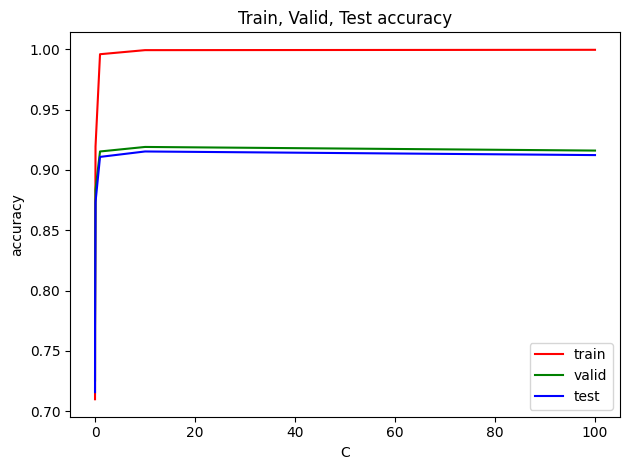

In [17]:
# 58
def LearningPreparation(name):
    df = pd.read_csv(PATH + "{}.feature.txt".format(name), index_col = 0)
    df["CATEGORY"] = df["CATEGORY"].map(Encoder)
    X = df.iloc[:,8:].values.tolist()
    Y = df["CATEGORY"].values.tolist()
    return X, Y
    # 52のように　データを読み込んで、X　Yをもらう

C_list = [0.001, 0.01, 0.1, 1, 10, 100]
# 正則化パラメータlist

X_train, Y_train = LearningPreparation("train")
X_valid, Y_valid = LearningPreparation("valid")
X_test, Y_test = LearningPreparation("test")

result = []
top_result = 0
# 59のため、ほかのmodelと比べる

for c in C_list:
    LR_model = LogisticRegression(C=c, max_iter=1500)
    LR_model.fit(X_train, Y_train)
    # modelを読み込んで

    Y_pred_train = LR_model.predict(X_train)
    train_result = accuracy_score(y_true = Y_train, y_pred = Y_pred_train)
    # train_dataの正解率を計算する

    Y_pred_valid = LR_model.predict(X_valid)
    valid_result = accuracy_score(y_true = Y_valid, y_pred = Y_pred_valid)
    # valid_dataの正解率を計算する
    top_result = max(top_result, valid_result)
    # 59のため、ほかのmodelと比べる


    Y_pred_test = LR_model.predict(X_test)
    test_result = accuracy_score(y_true = Y_test, y_pred = Y_pred_test)
    # test_dataの正解率を計算する

    result.append([c, train_result, valid_result, test_result])

# グラフを描く
C_list = [x[0] for x in result]
train_list = [x[1] for x in result]
valid_list = [x[2] for x in result]
test_list = [x[3] for x in result]

fig, ax = plt.subplots()
trian_color, valid_color, test_color = "r", "g", "b"
label_train, label_valid, label_test = "train", "valid", "test"

ax.set_xlabel("C")
ax.set_ylabel("accuracy")
ax.set_title("Train, Valid, Test accuracy")

ax.plot(C_list, train_list, color = trian_color, label = label_train)
ax.plot(C_list, valid_list, color = valid_color, label = label_valid)
ax.plot(C_list, test_list, color = test_color, label = label_test)

ax.legend(loc=0)
fig.tight_layout()
# グラフを調整する
fig.savefig(PATH+"Train_Valid_test_accuracy.png")

In [ ]:
# 59
from sklearn.svm import SVC
#サポートベクターマシン

print("Linear SVM")
for c in C_list:

  model = SVC(C = c, kernel="linear")
  model.fit(X_train, Y_train)
  Y_pred = model.predict(X_valid)
  valid_result = accuracy_score(y_true = Y_valid, y_pred = Y_pred)

  if valid_result > top_result:
    # もし　SVMの結果がより良い
      model_name = "Linear SVM"
      top_result = valid_result
      print("best result: {}".format(top_result))

  else:
    model_name = "Logistic_model"
    print("best result: {}".format(top_result))

Linear SVM
best result: 0.9190404797601199
